In this analyst, Census data from 2013-2014 are used for their information on the educational level of the population, the 2022 census lacks educational data and a similar population distribution is observed between the 2010 and 2022 censuses by age, as detailed in [ census report provided by www.censoecuador.gob.ec](https://www.censoecuador.gob.ec/wp-content/uploads/2023/10/Presentacio%CC%81n_Nacional_1%C2%B0entrega-5.pdf) ( Pages 29 to 31).

<div style="text-align: center;">
    <img src="../data/images/census_by_age_2010__2022.png" width="1000" height="700">
</div>

<div style="text-align: center;">
    <img src="../data/images/census_percentage_by_age_2010__2022.png" width="1000" height="700">
</div>

## 1. General code

## 1.1 Libraries and Initial Parameters


In [50]:
# data analysis
import pandas as pd
import numpy as np
from packages.common_functions import load_dataframe_to_csv, load_csv_into_dataframe

In [51]:
# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap, MarkerCluster

In [52]:
# Configuring initial parameters for the Matplotlib library
# In my analysis, I'm setting parameters for figure size, resolution, colors, fonts, grid, and legend.

params = {
    'figure.figsize': (16, 10),  # Figure size (width, height)
    'figure.dpi': 80,  # Figure resolution in dots per inch
    'figure.facecolor': 'white',  # Background color of the figure
    'figure.edgecolor': 'white',  # Border color of the figure
    'figure.frameon': True,  # Show or hide the frame of the figure
    'figure.constrained_layout.use': False,  # Enable constrained layout
    'figure.constrained_layout.h_pad': 0.04167,  # Horizontal spacing in constrained layout
    'figure.constrained_layout.w_pad': 0.04167,  # Vertical spacing in constrained layout
    'axes.labelsize': 12,  # Size of the axis labels
    'axes.titlesize': 14,  # Size of the title
    'axes.labelweight': 'normal',  # Font weight of the labels
    'xtick.labelsize': 10,  # Size of the x-axis labels
    'ytick.labelsize': 10,  # Size of the y-axis labels
    'xtick.color': 'black',  # Color of the x-axis labels
    'ytick.color': 'black',  # Color of the y-axis labels
    'axes.spines.top': True,  # Show or hide top border
    'axes.spines.right': True,  # Show or hide right border
    'legend.frameon': True,  # Show or hide legend frame
    'grid.linestyle': '-',  # Style of grid lines
    'grid.linewidth': 0.8,  # Width of grid lines
    'grid.color': 'gray',  # Color of grid lines
    'legend.fontsize': 10,  # Font size of the legend
    'axes.titleweight': 'normal',  # Font weight of the title
    'axes.titlecolor': 'black',  # Color of the title
    'axes.titlelocation': 'center',  # Title location (left, center, right)
}

# Applying the initial parameters
plt.rcParams.update(params)

# Setting the style to 'tableau-colorblind10'
plt.style.use('tableau-colorblind10')

# Activating inline visualization of plots
%matplotlib inline

In [53]:
# color palette for 'ULTIMO_NIVEL_EDUCATIVO' variables
education_levels_tableau_colors = {
    'Primaria': '#FF5733',  # Red
    'Educación básica': '#FFA07A',  # Light Salmon
    'Superior': '#FFFF66',  # Yellow
    'Secundaria': '#4CAF50',  # Green
    'Postgrado': '#3399FF',  # Dodger Blue
    'Post Bachillerato / Sup. No Universitario': '#800080',  # Purple
    'Educación Media o Bachillerato': '#8B4513',  # Saddle Brown
    'Ninguno': '#A9A9A9',  # Dark Gray
    'Alfabetización': '#FFC0CB',  # Pink
    'Educación inicial': '#00FFFF',  # Cyan
    np.nan: '#D3D3D3'  # Light Gray for NaN values
}

## 1.2 Read CSV

### 1.2.1 Dataset Pre-Imputation

In [54]:
# Loading the original dataset from a CSV file
# In my analysis, I'm reading the cleaned 2014 census data from the specified path into a DataFrame.

PATH_CSV_PRE_IMPUTATION = "../data/processed_csv/2014_census_clean.csv"

In [55]:
df_pre_imputation = load_csv_into_dataframe(PATH_CSV_PRE_IMPUTATION)

CSV file successfully load in DataFrame.


### 1.2.2 Dataset Post-Imputation

In [56]:
PATH_CSV_POST_IMPUTATION = "../data/processed_csv/2014_census_imputed.csv"

In [57]:
# Loading the original dataset from a CSV file
# In my analysis, I'm reading the cleaned 2014 census data from the specified path into a DataFrame.

df_post_imputation =load_csv_into_dataframe(PATH_CSV_POST_IMPUTATION)

CSV file successfully load in DataFrame.


### 1.2.3 Dataset of Approximately Geo Location

In [58]:
PATH_CSV_GEO = "../data/raw_csv/ecu_elderly_60_plus_2020.csv"

In [59]:
# Loading csv whit geo info of population age 60 plus
df_geo = load_csv_into_dataframe(PATH_CSV_GEO)

CSV file successfully load in DataFrame.


# 2. Interest Insights on Ecuador, Segmented by Pichincha, Quito, and Sub-segmented by Current Population (2023) Age 50 Plus


In [60]:
# Calculating the age threshold based on the year 2023
# In my analysis, I'm determining the age threshold for individuals of 50 years or more in 2023
calculate_age = 50 - (2023 - 2014)

In [61]:
# Pre-imputed Dataframe filtering for the 'PROVINCIA', 'CIUDAD' and 'EDAD' columns
df_pre_imputation_pichincha_quito = df_pre_imputation[(df_pre_imputation['PROVINCIA'] == 'Pichincha') & (df_pre_imputation['CIUDAD'] == 'Quito') & (df_pre_imputation['EDAD'] >= calculate_age)]

In [62]:
# Post-imputed Dataframe filtering for the 'PROVINCIA' and 'CIUDAD'  and 'EDAD' columns
df_post_imputation_pichincha_quito = df_post_imputation[(df_post_imputation['PROVINCIA'] == 'Pichincha') & (df_post_imputation['CIUDAD'] == 'Quito')& (df_post_imputation['EDAD'] >= calculate_age)]

## 2.1 Population by Educational Level

In [63]:
# data pre-imputation
education_values_pre_imputed = df_pre_imputation_pichincha_quito['ULTIMO_NIVEL_EDUCATIVO'].value_counts().reset_index()

#data post-imputation
education_values_post_imputed = df_post_imputation_pichincha_quito['ULTIMO_NIVEL_EDUCATIVO'].value_counts().reset_index()

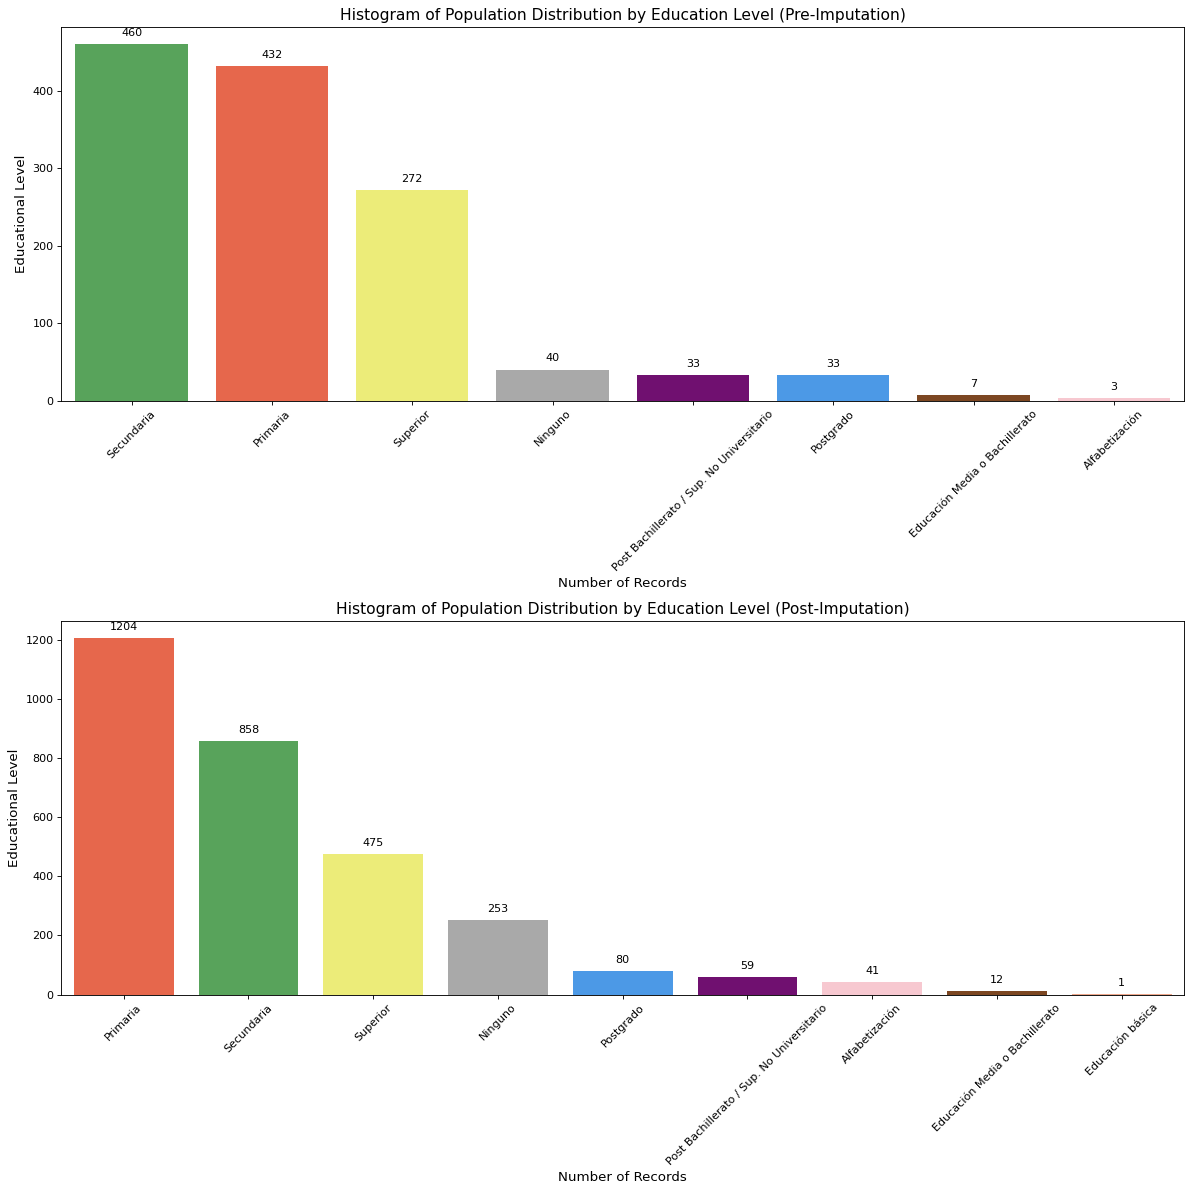

In [64]:
# create subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))

# subplot 1: pre-imputation
pre_imputed_plot = sns.barplot(data=education_values_pre_imputed, x='ULTIMO_NIVEL_EDUCATIVO', y='count', ax=axes[0], palette=education_levels_tableau_colors)
axes[0].set_ylabel('Educational Level')
axes[0].set_xlabel('Number of Records')
axes[0].set_title('Histogram of Population Distribution by Education Level (Pre-Imputation)')
axes[0].tick_params(axis='x', rotation=45)

# Anade etiquetas con valores exactos en subplot 1
for p in pre_imputed_plot.patches:
    axes[0].annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# subplot 2: post-imputation
post_imputed_plot = sns.barplot(data=education_values_post_imputed, x='ULTIMO_NIVEL_EDUCATIVO', y='count', ax=axes[1], palette=education_levels_tableau_colors)
axes[1].set_ylabel('Educational Level')
axes[1].set_xlabel('Number of Records')
axes[1].set_title('Histogram of Population Distribution by Education Level (Post-Imputation)')
axes[1].tick_params(axis='x', rotation=45)

# Anade etiquetas con valores exactos en subplot 2
for p in post_imputed_plot.patches:
    axes[1].annotate(f'{p.get_height():.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# adjust design to avoid superposition
plt.tight_layout()

# show histograms
plt.show()


 ### 2.1.1 Pre-Imputed Conclusion

The main columns within the analysis are:
1. **Secondary** with 858 records
2. **Primary** with 432 records
3. **Higher** with 272 records
4. Columns with fewer records *none, post high school, postgraduate, bachelor's degree and literacy skills*

### 2.1.2 Post-Imputed Conclusion

The main columns within the analysis are:
1. **Primary** with 1204 logs
2. **Secondary** with 858 logs
3. **Higher** with 475 logs 
4. Columns with fewer records *none, postgraduate, post high school, literacy and bachelor's degree*

## 2.2 Population Distribution by Age and Educational Level


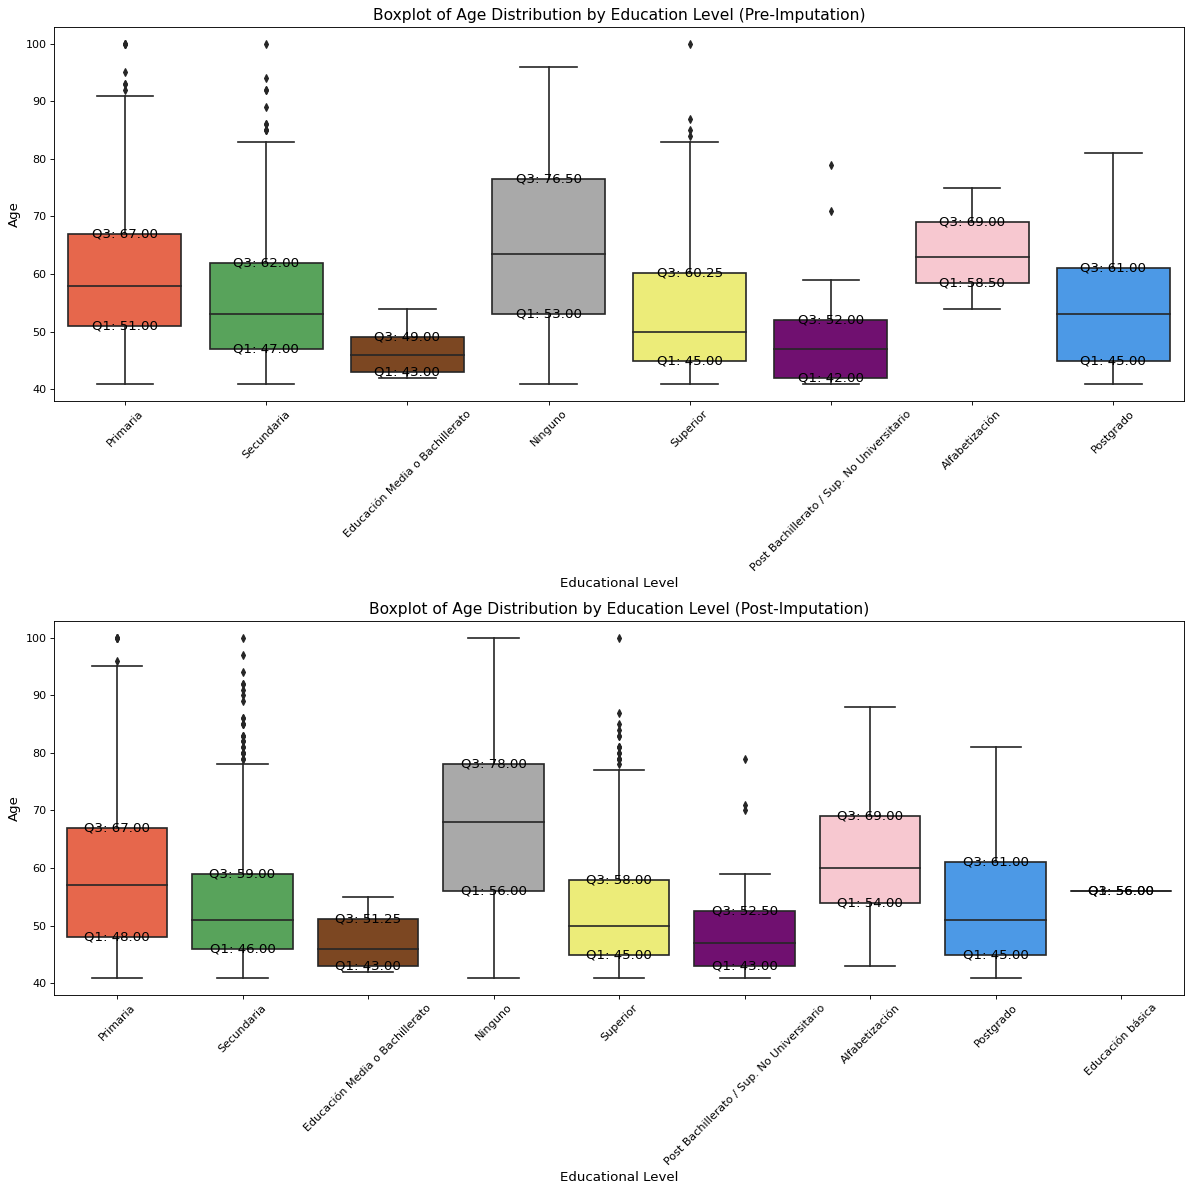

In [65]:
# create subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))

# Subplot 1: pre-imputation
pre_imputed_box = sns.boxplot(data=df_pre_imputation_pichincha_quito, x='ULTIMO_NIVEL_EDUCATIVO', y='EDAD', ax=axes[0], palette=education_levels_tableau_colors)
axes[0].set_ylabel('Age')
axes[0].set_xlabel('Educational Level')
axes[0].set_title('Boxplot of Age Distribution by Education Level (Pre-Imputation)')
axes[0].tick_params(axis='x', rotation=45)

# Calculate quartiles for subplot 1
pre_imputed_q1 = df_pre_imputation_pichincha_quito.groupby('ULTIMO_NIVEL_EDUCATIVO')['EDAD'].quantile(0.25)
pre_imputed_q3 = df_pre_imputation_pichincha_quito.groupby('ULTIMO_NIVEL_EDUCATIVO')['EDAD'].quantile(0.75)

# Add labels with quartile values in subplot 1
for i, level in enumerate(df_pre_imputation_pichincha_quito['ULTIMO_NIVEL_EDUCATIVO'].unique()):
    axes[0].text(i, pre_imputed_q1[level], f'Q1: {pre_imputed_q1[level]:.2f}', ha='center', va='center', color='black', fontsize=12)
    axes[0].text(i, pre_imputed_q3[level], f'Q3: {pre_imputed_q3[level]:.2f}', ha='center', va='center', color='black', fontsize=12)

# Subplot 2: post-imputation
post_imputed_box = sns.boxplot(data=df_post_imputation_pichincha_quito, x='ULTIMO_NIVEL_EDUCATIVO', y='EDAD', ax=axes[1], palette=education_levels_tableau_colors)
axes[1].set_ylabel('Age')
axes[1].set_xlabel('Educational Level')
axes[1].set_title('Boxplot of Age Distribution by Education Level (Post-Imputation)')
axes[1].tick_params(axis='x', rotation=45)

# Calculate quartiles for subplot 2
post_imputed_q1 = df_post_imputation_pichincha_quito.groupby('ULTIMO_NIVEL_EDUCATIVO')['EDAD'].quantile(0.25)
post_imputed_q3 = df_post_imputation_pichincha_quito.groupby('ULTIMO_NIVEL_EDUCATIVO')['EDAD'].quantile(0.75)

# Add labels with quartile values in subplot 2
for i, level in enumerate(df_post_imputation_pichincha_quito['ULTIMO_NIVEL_EDUCATIVO'].unique()):
    axes[1].text(i, post_imputed_q1[level], f'Q1: {post_imputed_q1[level]:.2f}', ha='center', va='center', color='black', fontsize=12)
    axes[1].text(i, post_imputed_q3[level], f'Q3: {post_imputed_q3[level]:.2f}', ha='center', va='center', color='black', fontsize=12)

# Adjust design to avoid superposition
plt.tight_layout()

# show box plots
plt.show()


### 2.2.1 Pre-Imputed Conclusion

- The age range for individuals with **no formal education** spans between **53 and 76 years**.

- For those with **literacy skills**, the age range is observed between **50 and 69 years**.

- For individuals with **primary school education**, the highest number of records is observed between **51 and 67 years** old.

- Those with **secondary education** show a concentration between **47 and 62 years**.

- The **bachelor's degree** category shows its peak between **43 and 49 years**.

- Individuals with a **higher education** background are most prevalent between **45 and 60 years**.

- Individuals with **post-bachelor's or non-university higher education** typically fall between **42 and 52 years**.

- Individuals pursuing **postgraduate education** tend to be between **45 and 61 years** old.

### 2.2.2 Post-Imputed Conclusion

- The age range for individuals with **no formal education** spans between **56 and 70 years**.

- For those with **literacy skills**, the age range is observed between **54 and 69 years**.

- For individuals with **primary school education**, the highest number of records is observed between **40 and 67 years** old.

- Those with **secondary education** show a concentration between **46 and 59 years**.

- The **bachelor's degree** category shows its peak between **43 and 51 years**.

- Individuals with a **higher education** background are most prevalent between **45 and 50 years**.

- Individuals with **post-bachelor's or non-university higher education** typically fall between **43 and 52 years**.

- Individuals pursuing **postgraduate education** tend to be between **45 and 61 years** old.

## 2.3 Population by Area

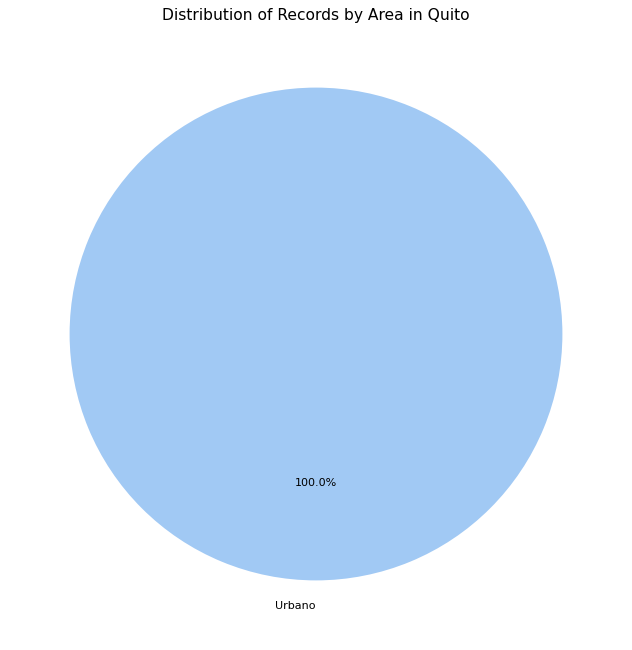

In [66]:
# Getting the count of records by 'AREA_2000'
# In my analysis, I'm calculating the value counts of the 'AREA_2000' column in the Quito subset.

df_pichincha_quito_counts_by_area = df_pre_imputation_pichincha_quito['AREA_2000'].value_counts().reset_index()

# Creating a pie chart
# In my analysis, I'm visualizing the distribution of records by area in Quito using a pie chart.

plt.pie(df_pichincha_quito_counts_by_area['count'], labels=df_pichincha_quito_counts_by_area['AREA_2000'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Distribution of Records by Area in Quito')
plt.show()


### 2.3.1 Pre-Imputed Conclusion

- The data reveals that the area is **100% urban**.

**Note:** As the entire area is urban, no further analysis related to the area will be derived.

### 2.3.2 Post-Imputed Conclusion

no added new information later imputation null values in column

## 2.4 Population by Natural Region

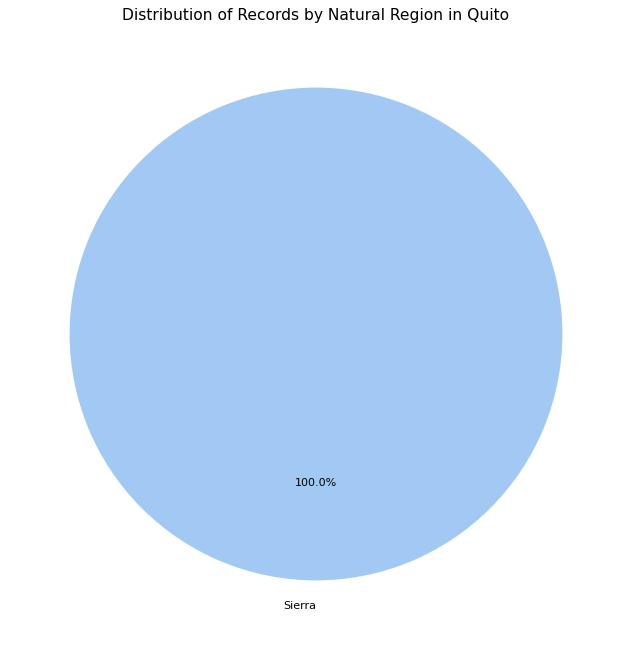

In [67]:
# Getting the count of records by 'REGION_NATURAL' in Quito
# In my analysis, I'm calculating the value counts of the 'REGION_NATURAL' column in the Quito subset.

df_pichincha_quito_counts_by_region = df_pre_imputation_pichincha_quito['REGION_NATURAL'].value_counts().reset_index()

# Creating a pie chart
# In my analysis, I'm visualizing the distribution of records by natural region in Quito using a pie chart.

plt.pie(df_pichincha_quito_counts_by_region['count'], labels=df_pichincha_quito_counts_by_region['REGION_NATURAL'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Distribution of Records by Natural Region in Quito')
plt.show()


### 2.4.1 Pre-Imputed Conclusion

- The data indicates that the natural region is **100% Sierra**.

**Note:** As the entire region is Sierra, no further analysis related to the natural region will be derived.


### 2.4.2 Post-Imputed Conclusion

no added new information later imputation null values in column

## 2.5 Population by Education Level and Sex

In [68]:
# Grouping by 'ULTIMO_NIVEL_EDUCATIVO' and 'SEXO' and calculating the count of records
# In my analysis, I'm grouping the data by education level and gender in the Quito subset and calculating the count of records.

df_edu_sex_pre_imputed = df_pre_imputation_pichincha_quito.groupby(['ULTIMO_NIVEL_EDUCATIVO', 'SEXO']).size().reset_index(name='Records by gender')
df_edu_sex_post_imputed = df_post_imputation_pichincha_quito.groupby(['ULTIMO_NIVEL_EDUCATIVO', 'SEXO']).size().reset_index(name='Records by gender')

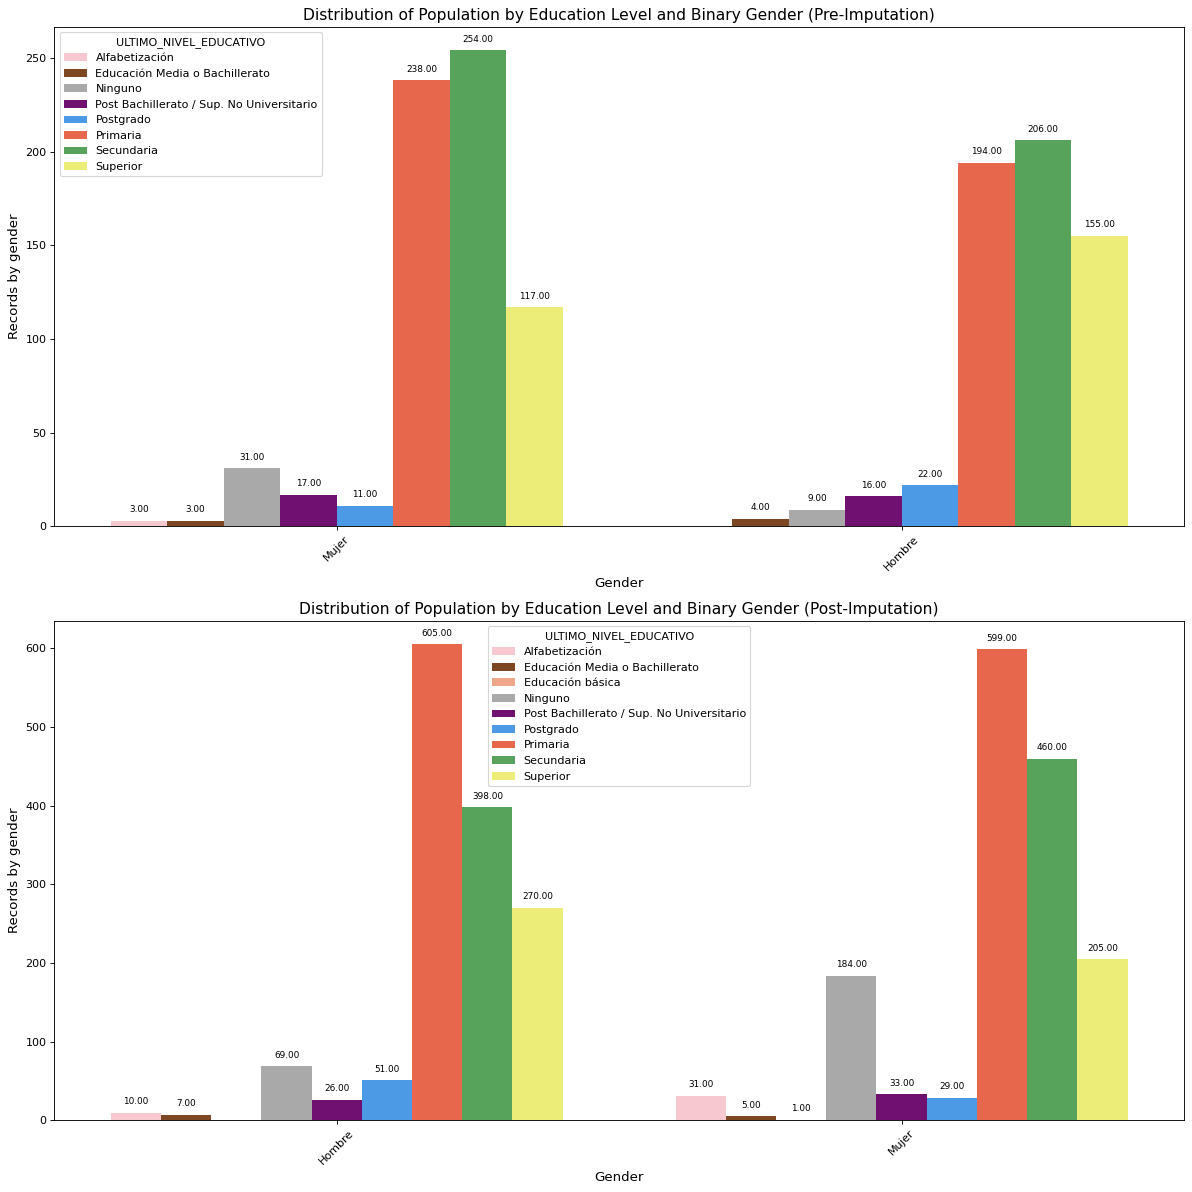

In [69]:
# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))

# Subplot 1: Pre-imputation
pre_imputed_bar = sns.barplot(x='SEXO', y='Records by gender', data=df_edu_sex_pre_imputed, ax=axes[0], hue='ULTIMO_NIVEL_EDUCATIVO', palette=education_levels_tableau_colors)
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Records by gender')
axes[0].set_title('Distribution of Population by Education Level and Binary Gender (Pre-Imputation)')
axes[0].tick_params(axis='x', rotation=45)

# Add labels with exact values in subplot 1
for p in pre_imputed_bar.patches:
    height = p.get_height()
    axes[0].annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 10), textcoords='offset points', color='black', fontsize=8)

# Subplot 2: Post-imputation
post_imputed_bar = sns.barplot(x='SEXO', y='Records by gender', data=df_edu_sex_post_imputed, ax=axes[1], hue='ULTIMO_NIVEL_EDUCATIVO', palette=education_levels_tableau_colors)
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Records by gender')
axes[1].set_title('Distribution of Population by Education Level and Binary Gender (Post-Imputation)')
axes[1].tick_params(axis='x', rotation=45)

# Add labels with exact values in subplot 2
for p in post_imputed_bar.patches:
    height = p.get_height()
    axes[1].annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 10), textcoords='offset points', color='black', fontsize=8)

# Adjust design to avoid superposition
plt.tight_layout()

# Show bar plots
plt.show()


### 2.5.1 Pre-Imputed Conclusion

- In general, it is observed that females tend to have their highest academic attainment in categories such as **none, primary, higher and secondary education** compared to males.

- Conversely, males exhibit a higher prevalence in the **advanced education degrees for example  postgraduate and higher education and** categories.

**Note:** This suggests a gender-based disparity in educational levels, with females leaning towards basic education and males having a higher representation in advanced academic levels.

### 2.5.2 Post-Imputed Conclusion

The same differences remain to before analysis into previous imputation

## 2.6 Education Trends Between 2013 and 2014


In [70]:
# Getting the count of records by year (pre-imputation)
df_regs_years_pre_imputed = df_pre_imputation_pichincha_quito['ANIO'].value_counts()

# Getting the count of records by year (post-imputation)
df_regs_years_post_imputed = df_post_imputation_pichincha_quito['ANIO'].value_counts()

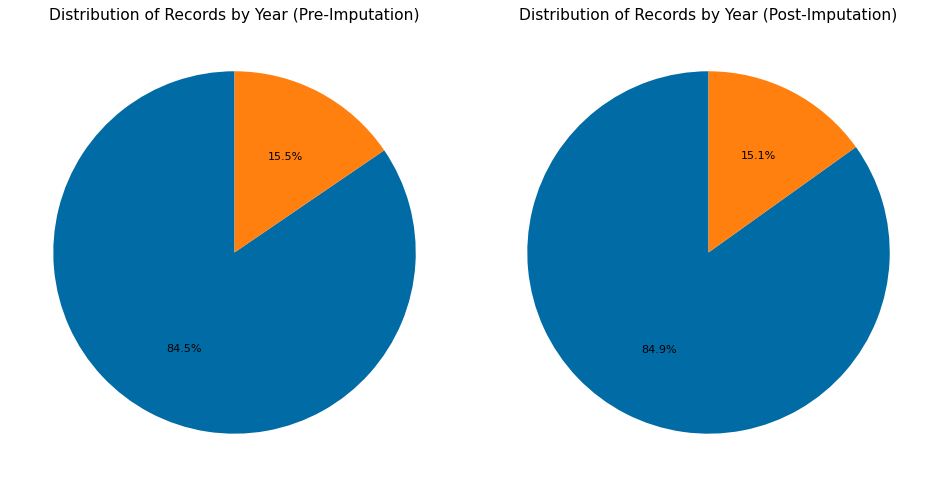

In [71]:
# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Subplot 1: Pre-imputation
axes[0].pie(df_regs_years_pre_imputed, autopct='%1.1f%%', startangle=90, labels=None)
axes[0].set_title('Distribution of Records by Year (Pre-Imputation)')

# Subplot 2: Post-imputation
axes[1].pie(df_regs_years_post_imputed, autopct='%1.1f%%', startangle=90, labels=None)
axes[1].set_title('Distribution of Records by Year (Post-Imputation)')

# Adjust design to avoid superposition
plt.tight_layout()

# Show pie plots
plt.show()

- Pre-imputed: It is identified that the proportion of registrations in 2014 is 5.5 times higher
- Post-imputed: It is identified that the proportion of registrations in 2014 is 4.8 times higher

In [72]:
# Grouping by 'ULTIMO_NIVEL_EDUCATIVO' and 'ANIO' and calculating the count of records
# In my analysis, I'm grouping the data by education level and year in the Quito subset and calculating the count of records.

df_pre_imputation_edu_year = df_pre_imputation_pichincha_quito.groupby(['ULTIMO_NIVEL_EDUCATIVO', 'ANIO']).size().reset_index(name='Records by year')
# Adjusting the proportion of records in 2014
# In my analysis, I'm adjusting the count of records in 2014 for better visualization.

df_pre_imputation_edu_year['Records by year'] = df_pre_imputation_edu_year.apply(lambda row: row['Records by year'] // 5.5 if row['ANIO'] == 2014 else row['Records by year'], axis=1)

In [73]:
df_post_imputation_edu_year = df_post_imputation_pichincha_quito.groupby(['ULTIMO_NIVEL_EDUCATIVO', 'ANIO']).size().reset_index(name='Records by year')
df_post_imputation_edu_year['Records by year'] = df_post_imputation_edu_year.apply(lambda row: row['Records by year'] // 5.5 if row['ANIO'] == 2014 else row['Records by year'], axis=1)

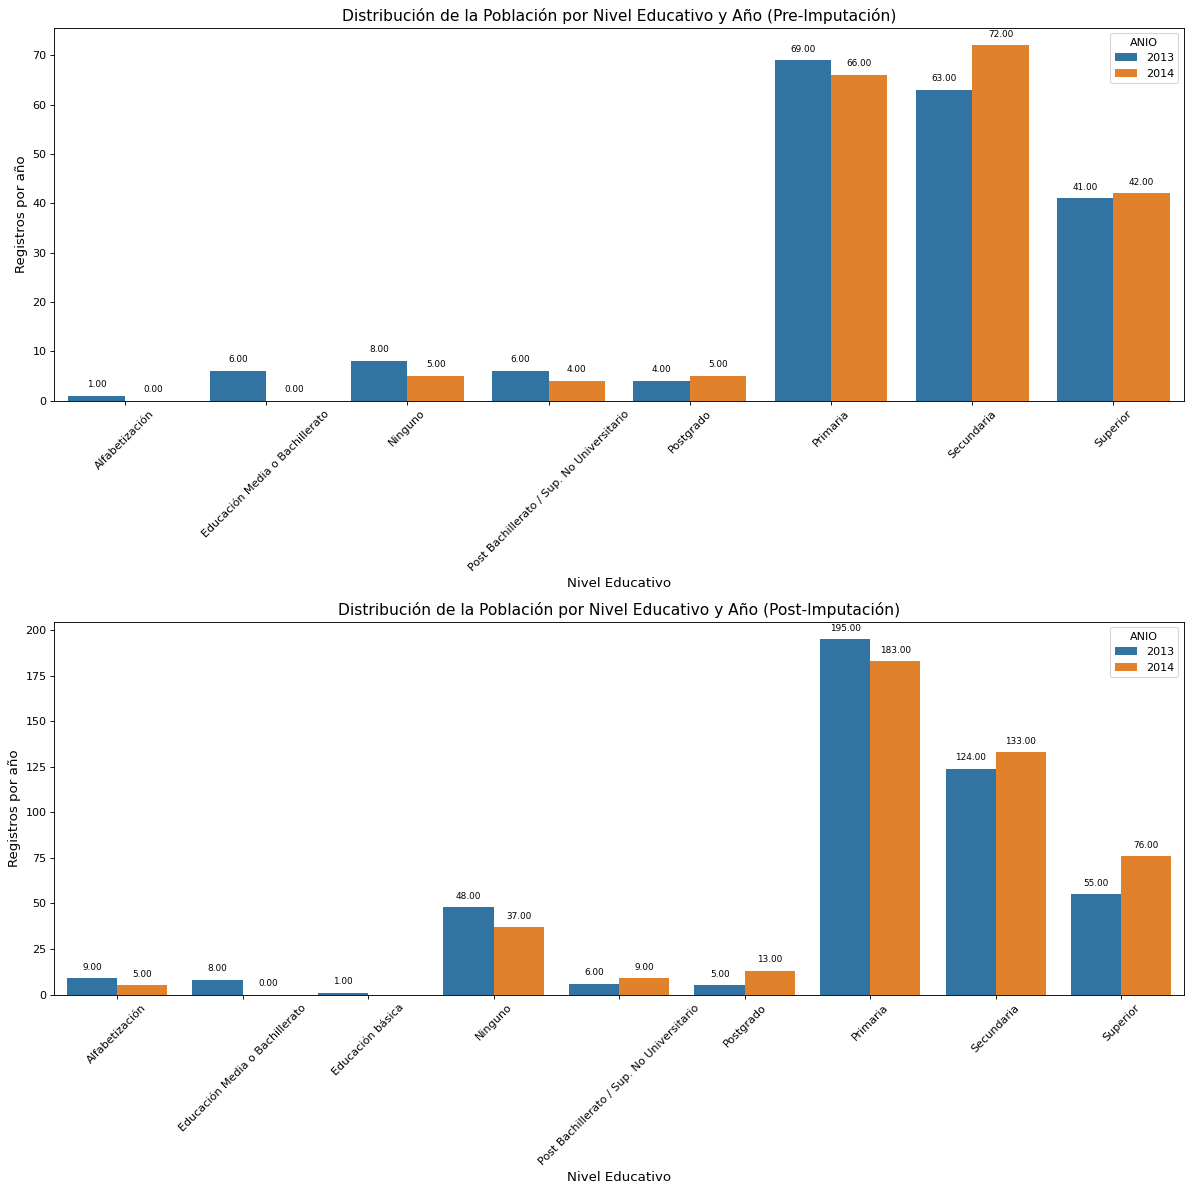

In [74]:
# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 15))

# Primer subplot: Pre-imputation
pre_imputed_bar = sns.barplot(x='ULTIMO_NIVEL_EDUCATIVO', y='Records by year', hue='ANIO', data=df_pre_imputation_edu_year, palette='tab10', ax=axes[0])
axes[0].set_xlabel('Nivel Educativo')
axes[0].set_ylabel('Registros por año')
axes[0].set_title('Distribución de la Población por Nivel Educativo y Año (Pre-Imputación)')
axes[0].tick_params(axis='x', labelrotation=45)

# Add labels with exact values in subplot 1
for p in pre_imputed_bar.patches:
    height = p.get_height()
    axes[0].annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 10), textcoords='offset points', color='black', fontsize=8)

# Segundo subplot: post-imputation
post_imputed_bar = sns.barplot(x='ULTIMO_NIVEL_EDUCATIVO', y='Records by year', hue='ANIO', data=df_post_imputation_edu_year, palette='tab10', ax=axes[1])
axes[1].set_xlabel('Nivel Educativo')
axes[1].set_ylabel('Registros por año')
axes[1].set_title('Distribución de la Población por Nivel Educativo y Año (Post-Imputación)')
axes[1].tick_params(axis='x', labelrotation=45)

# Add labels with exact values in subplot 2
for p in post_imputed_bar.patches:
    height = p.get_height()
    axes[1].annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', xytext=(0, 10), textcoords='offset points', color='black', fontsize=8)

# Adjust design to avoid superposition
plt.tight_layout()
plt.show()


### 2.6.1 Pre-Imputed Conclusion

- The analysis reveals that in categories such as **literacy, no formal education, non-university higher education and primary**, there is a mild higher number of records in the year **2013**.

- Interestingly, in **2014**, there is a subtle mild increase in the index for remaining categories like **secondary, higher and postgraduate education**.

**Note:** This indicates variations in educational distribution across mild different categories between the years 2013 and 2014.


### 2.6.2 Post-Imputed Conclusion

The overall observations remain consistent prior to imputation, except for the **Non-university higher education** in this case, a slight increase into year 2014.


## 2.7 Population Age 60 Plus by Geographic Location

In [75]:
# Pichincha city range of coordinates approximation
latitude_range = (-0.270104, -0.070104)
longitude_range = (-78.550249, -78.350249)

In [76]:
# DataFrame filtered by previously defined coordinates
df_geo_quito_pichincha = df_geo[
    (latitude_range[1] >= df_geo['latitude']) & (df_geo['latitude'] >= latitude_range[0]) &
    (longitude_range[1] >= df_geo['longitude']) & (df_geo['longitude'] >= longitude_range[0])
]

In [77]:
# Center coordinates
center_lat, center_lon = np.mean(latitude_range), np.mean(longitude_range)

# Creating an initialized map based on center latitudes and longitudes
m = folium.Map(location=[center_lat, center_lon], zoom_start=11)

In [78]:
# Grouping DataFrame every ten records and using the mean of each group to protect exact data within the graph
df_grouped = df_geo_quito_pichincha.groupby(np.arange(len(df_geo_quito_pichincha)) // 10).agg(
    {
        'latitude': 'mean',
        'longitude': 'mean',
        'ecu_elderly_60_plus_2020': 'mean'
    }
).reset_index()

In [79]:
# Creating a heatmap with previous data
heat_data = [[row['latitude'], row['longitude'], row['ecu_elderly_60_plus_2020']] for _, row in df_grouped.iterrows()]

In [80]:
HeatMap(
    heat_data,
    radius=15,
    min_opacity=0.3,
    max_zoom=15,
    blur=25,
    max_val=0.5,
    gradient={0.2: 'blue', 0.4: 'lime', 0.6: 'orange', 1: 'red'}
).add_to(m)

# Adding clusters with counters and colors for different densities
marker_cluster = MarkerCluster().add_to(m)

# Adding individual markers to the cluster
for _, row in df_grouped.iterrows():
    folium.Marker(
        [row['latitude'], row['longitude']],
        popup=f"Count: {row['ecu_elderly_60_plus_2020']:.2f}"
    ).add_to(marker_cluster)

/var/folders/sf/zv8w99hn1570688_wf9y1h280000gn/T/ipykernel_34645/1051980544.py:1: UserWarning: The `max_val` parameter is no longer necessary. The largest intensity is calculated automatically.
  HeatMap(


<div style="text-align: center;">
    <img src="../data/images/approximate_location_of_population_age_60_plus.png" width="1000" height="700">
</div>

In [81]:
# path to save generated interactive map
PATH_GENERED_MAPS_WITH_FOLIUM = '../data/genered_maps/'

In [82]:
# name and extension for interactive map generated
NAME_MARKER_MAP_WITH_FOLIUM = 'heatmap_grouped_marker_density_clusters_map.html'

In [83]:
# save interactive map
m.save(PATH_GENERED_MAPS_WITH_FOLIUM + NAME_MARKER_MAP_WITH_FOLIUM)

### 2.7.1 Conclusion of Approximately Geo Location


The population aged 60 and above is distributed along the principal streets in the following areas:

- **Lengthwise Distribution:**
  - Coordinates: Latitude: -0.232127, Longitude: -78.5130033 to Latitude: -0.077186, Longitude: -78.464020.

- **Widthwise Distribution:**
  - Coordinates: Latitude: -0.148391, Longitude: -78.502753 to Latitude: -0.1595376, Longitude: -78.4577653.

 ## 2.8 Final Conclusion

Population Distribution of Age 60 and Above in Pichincha Province, Quito City is **Concentrated on the Principal Streets**.


### 2.8.1 Pre-imputed final conclusion

**Non-University Higher Education:**
  - Age range: 42 to 52 years.
  - Slightly higher representation in females.

**Higher Education:**
  - Age range: 45 to 60 years.
  - Mainly pronounced in males.

**Postgraduate Education:**
  - Age range: 45 to 61 years.
  - Mainly pronounced in males.

### 2.8.2 Post-imputed final conclusion

**Non-University Higher Education:**
- Age range: 43 to 52 years.
- Mainly pronounced on females.

**Higher Education:**
  - Age range: 45 to 50 years.
  - Mainly pronounced on males.

**Postgraduate Education:**
  - Age range: 45 to 61 years.
  - Mainly pronounced on males.